# Setup and General Data Overview

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!nvidia-smi

Fri Jun 18 19:53:02 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P0    25W / 300W |      0MiB / 16160MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
from psutil import virtual_memory
virtual_memory().total / 1e9

27.339640832

Special thanks to [watsonbox's exportify repo](https://github.com/watsonbox/exportify) which allowed me to pull all of these songs and their features down from Spotify.

In [4]:
import os.path

# raw_data = pd.read_csv('data/liked_labeled.csv') # local only
if os.path.isfile('liked_labeled.csv') == False:
  !wget https://raw.githubusercontent.com/nullmaxwell/learnify/main/data/liked_labeled.csv
else:
  print("Data already present!")
raw_data = pd.read_csv('liked_labeled.csv')

Data already present!


In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4296 entries, 0 to 4295
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            4296 non-null   int64  
 1   Track URI             4296 non-null   object 
 2   Track Name            4296 non-null   object 
 3   Artist URI(s)         4296 non-null   object 
 4   Artist Name(s)        4296 non-null   object 
 5   Album URI             4296 non-null   object 
 6   Album Name            4296 non-null   object 
 7   Album Artist URI(s)   4296 non-null   object 
 8   Album Artist Name(s)  4296 non-null   object 
 9   Album Release Date    4296 non-null   object 
 10  Album Image URL       4296 non-null   object 
 11  Disc Number           4296 non-null   int64  
 12  Track Number          4296 non-null   int64  
 13  Track Duration (ms)   4296 non-null   int64  
 14  Track Preview URL     3247 non-null   object 
 15  Explicit             

In [6]:
raw_data.describe()

,Unnamed: 0,Disc Number,Track Number,Track Duration (ms),Popularity,Added By,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature
count,4296.000000,4296.000000,4296.000000,4.296000e+03,4296.000000,0.0,4293.000000,4293.000000,4293.000000,4293.000000,4293.000000,4293.000000,4293.000000,4293.000000,4293.000000,4293.000000,4293.000000,4293.000000
mean,2147.500000,1.032588,6.540503,2.423103e+05,31.929004,NaN,0.563541,0.533308,5.220825,-10.394896,0.612625,0.103522,0.374874,0.323438,0.192953,0.387757,117.886939,3.894712
std,1240.292707,0.321318,6.242312,2.894246e+05,23.515855,NaN,0.185046,0.247769,3.635817,6.086908,0.487207,0.122246,0.344682,0.383817,0.163539,0.249579,30.341885,0.472055
min,0.000000,1.000000,1.000000,4.800000e+03,0.000000,NaN,0.000000,0.000098,0.000000,-46.829000,0.000000,0.000000,0.000002,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1073.750000,1.000000,2.000000,1.648762e+05,7.000000,NaN,0.453000,0.360000,2.000000,-12.582000,0.000000,0.037200,0.047200,0.000082,0.098500,0.175000,93.919000,4.000000
50%,2147.500000,1.000000,5.000000,2.148260e+05,34.000000,NaN,0.584000,0.550000,5.000000,-8.774000,1.000000,0.050900,0.274000,0.047200,0.121000,0.363000,117.964000,4.000000
75%,3221.250000,1.000000,9.000000,2.657785e+05,51.000000,NaN,0.694000,0.729000,8.000000,-6.421000,1.000000,0.105000,0.703000,0.781000,0.229000,0.573000,137.941000,4.000000
max,4295.000000,11.000000,42.000000,9.146416e+06,96.000000,NaN,0.980000,0.993000,11.000000,-0.394000,1.000000,0.928000,0.996000,0.991000,0.985000,0.982000,214.131000,5.000000


# Data Exploration/Analysis

## Looking at liked songs generally first

Note: The label in the last column constitutes a song that I like.

In [7]:
analysis_data = raw_data.copy()
analysis_data = analysis_data.loc[analysis_data['Label'] == True]
analysis_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2092 entries, 3 to 4293
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            2092 non-null   int64  
 1   Track URI             2092 non-null   object 
 2   Track Name            2092 non-null   object 
 3   Artist URI(s)         2092 non-null   object 
 4   Artist Name(s)        2092 non-null   object 
 5   Album URI             2092 non-null   object 
 6   Album Name            2092 non-null   object 
 7   Album Artist URI(s)   2092 non-null   object 
 8   Album Artist Name(s)  2092 non-null   object 
 9   Album Release Date    2092 non-null   object 
 10  Album Image URL       2092 non-null   object 
 11  Disc Number           2092 non-null   int64  
 12  Track Number          2092 non-null   int64  
 13  Track Duration (ms)   2092 non-null   int64  
 14  Track Preview URL     1627 non-null   object 
 15  Explicit             

Several of the following visulizations are inspired and modified from [pavelkomarov's tast_analysis notebook](https://github.com/pavelkomarov/exportify/blob/master/taste_analysis.ipynb).

In [8]:
from collections import defaultdict
artists = defaultdict(int)
for i,song in analysis_data.iterrows():
	for musician in song['Artist Name(s)'].split(','):
		artists[musician] += 1

artists = pd.DataFrame(artists.items(), columns=['Artist', 'Track Count']).sort_values('Track Count', ascending=False).reset_index(drop=True)

print("Number of unique artists: " + str(len(analysis_data['Artist Name(s)'].unique())))

Number of unique artists: 936


Text(0.5, 1.0, 'Top 50 Artists by Number of Songs')

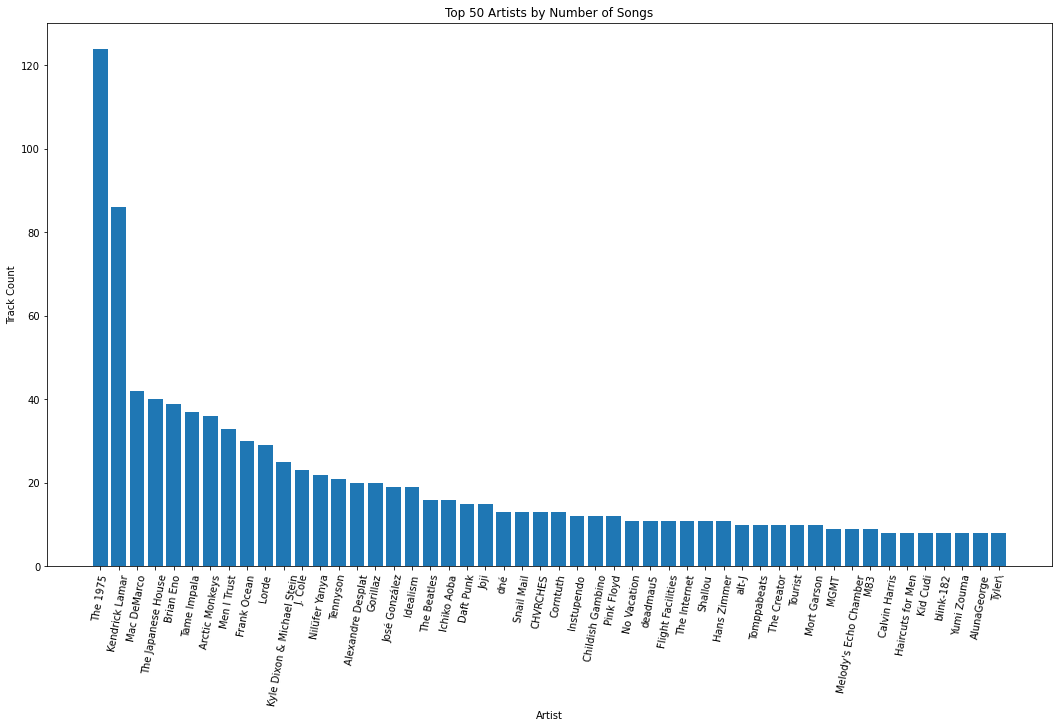

In [9]:
plt.figure(figsize=(18, 10))
plt.bar(artists['Artist'][:50], artists['Track Count'][:50])
plt.xticks(rotation=80)
plt.xlabel(artists.columns[0])
plt.ylabel(artists.columns[1])
plt.title('Top 50 Artists by Number of Songs')

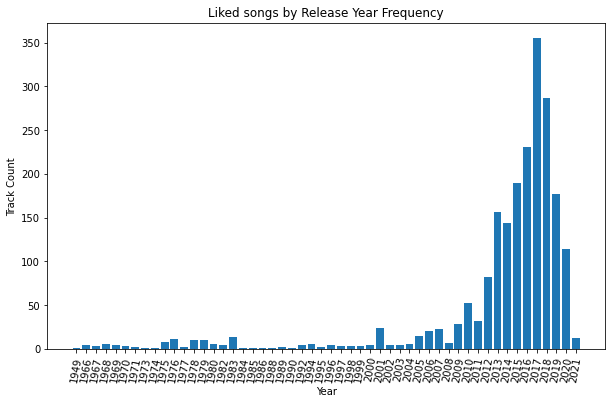

In [10]:
years = defaultdict(int)
for i,song in analysis_data.iterrows():
    years[song['Album Release Date'][:4]] += 1

years = pd.DataFrame(years.items(), columns=['Year', 'Track Count']).sort_values('Year')

plt.figure(figsize=(10, 6))
plt.bar(years['Year'], years['Track Count'])
plt.xticks(rotation=80)
plt.xlabel(years.columns[0])
plt.ylabel(years.columns[1])
plt.title('Liked songs by Release Year Frequency');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


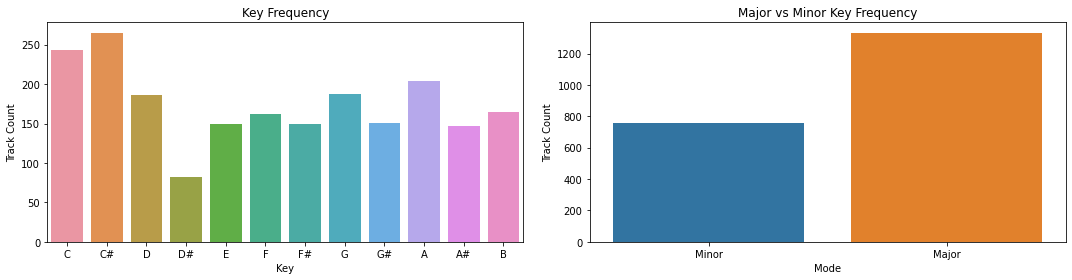

In [11]:
import seaborn as sns

plt.figure(figsize=(15,4))

plt.subplot(1, 2, 1)
axes = sns.countplot(analysis_data['Key'])
axes.set(xticklabels=['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B'])
plt.ylabel('Track Count')
plt.title('Key Frequency')

plt.subplot(1, 2, 2)
axes = sns.countplot(analysis_data['Mode'])
axes.set(xticklabels=['Minor', 'Major'])
plt.ylabel('Track Count')
plt.title('Major vs Minor Key Frequency');

plt.tight_layout(w_pad=2)

## Looking at the Bigger Picture


In [12]:
analysis_data = raw_data.copy()
analysis_data.groupby('Label').mean()

,Unnamed: 0,Disc Number,Track Number,Track Duration (ms),Explicit,Popularity,Added By,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature
Label,,,,,,,,,,,,,,,,,,,
False,2198.617060,1.040381,7.369328,236687.539927,0.164701,27.604809,NaN,0.559191,0.529814,5.263397,-10.538458,0.589464,0.114923,0.377752,0.351939,0.200036,0.391058,117.172566,3.883742
True,2093.646272,1.024379,5.667304,248234.139101,0.174952,36.484704,NaN,0.568123,0.536986,5.175992,-10.243712,0.637016,0.091516,0.371844,0.293425,0.185493,0.384280,118.639233,3.906265


From this we have some observations:
- The average popularity of songs that I like is more than those I do not like.
- On average I am liking more tracks that are in a Major key.
- I tend to like lett speechy tracks.
- I prefer less instrumental tracks (not by too much). According to [Spotify's API reference](https://developer.spotify.com/documentation/web-api/reference/) this would indicate that on average my liked songs are containing more vocal content, which is interesting because if someone were to ask me this question I would probably respond with the opposite observation.

In [13]:
# ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
analysis_data.groupby('Key').mean()

,Unnamed: 0,Disc Number,Track Number,Track Duration (ms),Explicit,Popularity,Added By,Danceability,Energy,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Label
Key,,,,,,,,,,,,,,,,,,,
0.0,2085.915152,1.038384,6.721212,221065.911111,0.137374,32.064646,NaN,0.548035,0.517326,-10.461842,0.789899,0.085621,0.398969,0.338569,0.185462,0.378276,118.144028,3.890909,0.490909
1.0,2147.745283,1.035849,6.307547,250480.715094,0.283019,31.049057,NaN,0.603719,0.558732,-9.750691,0.686792,0.131452,0.321296,0.301386,0.190895,0.392844,117.221072,3.949057,0.500000
2.0,2247.328395,1.039506,6.506173,231245.464198,0.123457,29.846914,NaN,0.533584,0.535737,-10.179793,0.782716,0.086269,0.374760,0.321024,0.194462,0.375006,116.695281,3.883951,0.459259
3.0,2125.042857,1.007143,6.385714,212895.457143,0.128571,32.821429,NaN,0.555042,0.431869,-12.807400,0.621429,0.092522,0.503701,0.413260,0.165076,0.352465,113.129664,3.864286,0.585714
4.0,2096.023490,1.026846,6.721477,242011.560403,0.140940,33.248322,NaN,0.541803,0.536351,-10.178040,0.489933,0.084041,0.392277,0.300525,0.207067,0.378469,119.907872,3.889262,0.500000
5.0,2136.562310,1.027356,6.519757,266010.182371,0.133739,31.413374,NaN,0.550513,0.536502,-10.515988,0.574468,0.094173,0.396759,0.330578,0.198621,0.396662,116.075881,3.893617,0.492401
6.0,2081.170492,1.013115,6.501639,249424.918033,0.134426,29.796721,NaN,0.566066,0.541556,-10.186374,0.452459,0.110742,0.363552,0.341945,0.199674,0.387511,119.213754,3.947541,0.491803
7.0,2222.311751,1.059952,6.568345,232041.546763,0.141487,34.621103,NaN,0.555553,0.536761,-10.542427,0.721823,0.103544,0.376695,0.328109,0.194372,0.395613,117.615417,3.844125,0.450839
8.0,2278.511327,1.029126,6.508091,232546.417476,0.165049,31.074434,NaN,0.577841,0.500842,-11.172091,0.656958,0.112780,0.397335,0.361743,0.188878,0.369049,115.625071,3.841424,0.488673


- Songs in C# are on average the most explicit? This is pretty interesting.
- The most popular songs have a key of G.

In [14]:
cmatrix = analysis_data.corr()
cmatrix["Label"].sort_values(ascending = False)

Label                  1.000000
Popularity             0.188764
Mode                   0.048790
Loudness               0.024206
Tempo                  0.024164
Danceability           0.024129
Time Signature         0.023851
Track Duration (ms)    0.019943
Energy                 0.014470
Explicit               0.013651
Acousticness          -0.008568
Key                   -0.012017
Valence               -0.013575
Disc Number           -0.024896
Unnamed: 0            -0.042307
Liveness              -0.044454
Instrumentalness      -0.076210
Speechiness           -0.095719
Track Number          -0.136299
Added By                    NaN
Name: Label, dtype: float64

From this correlation reading I'm inclined to believe that Track Number would be rather important in determing which songs I would like, but it's important to rmemeber there may be some bias here because single realeases would have a track number of 1 while tracks that reside within a full album will have a lot more variance.

Text(0, 0.5, 'Frequency of Occurance')

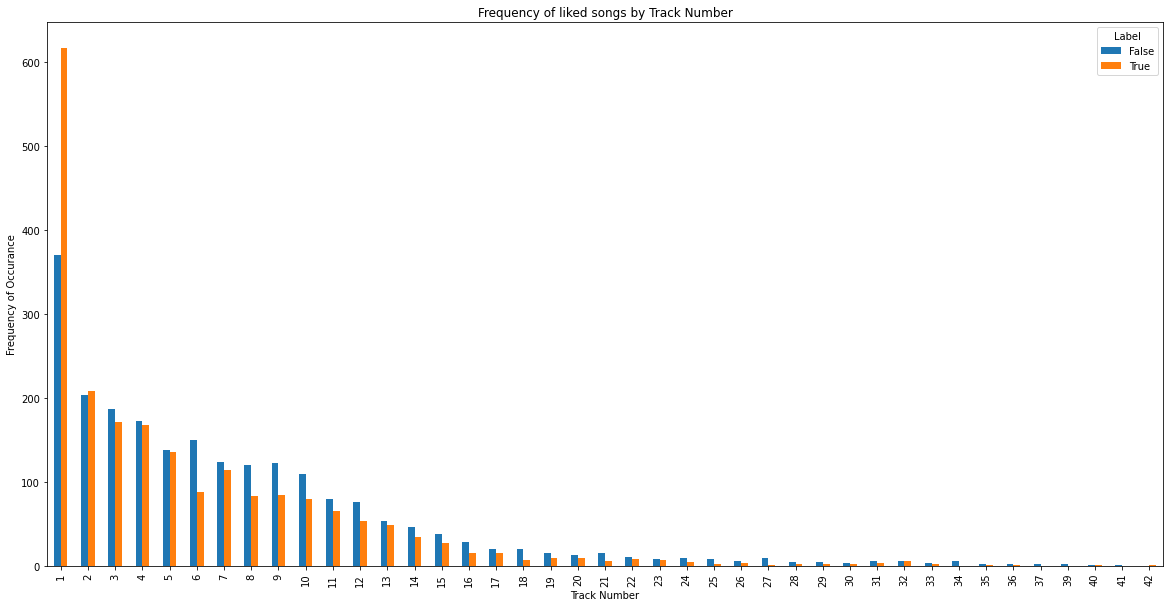

In [15]:
pd.crosstab(analysis_data['Track Number'], analysis_data.Label).plot(kind = 'bar', figsize = (20,10))
plt.title('Frequency of liked songs by Track Number')
plt.xlabel('Track Number')
plt.ylabel('Frequency of Occurance')

Sure enough we can see this imbalance indicating the presence of the bias I suspected. We will ditch this variable later on in the cleaning phase.

Text(0, 0.5, 'Frequency of Occurance')

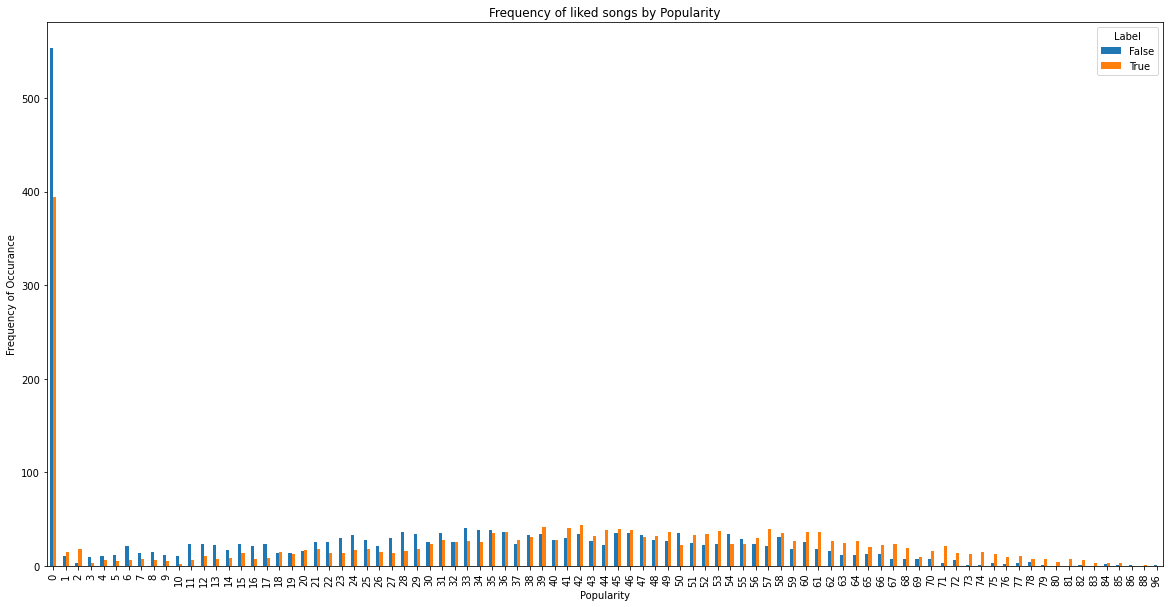

In [16]:
pd.crosstab(analysis_data['Popularity'].round(), analysis_data.Label).plot(kind = 'bar', figsize = (20,10))
plt.title('Frequency of liked songs by Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency of Occurance')

Text(0, 0.5, 'Frequency of Occurance')

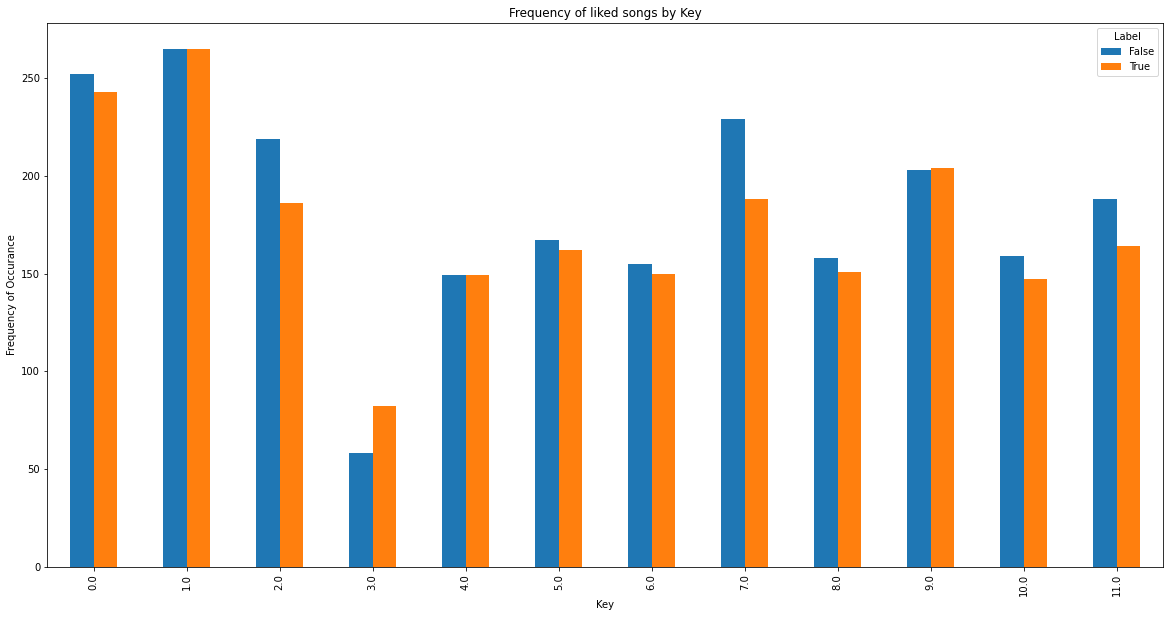

In [17]:
pd.crosstab(analysis_data['Key'], analysis_data.Label).plot(kind = 'bar', figsize = (20,10))
plt.title('Frequency of liked songs by Key')
plt.xlabel('Key')
plt.ylabel('Frequency of Occurance')

Nothing incredibly telling with popularity and key. We will keep these variables around. It also appears that there are no major imbalances present (at least in these variables).

# Data Cleaning

In [18]:
processing_data = raw_data.copy()

# Features we are going to be training on
features = ['Explicit', 
            'Popularity', 
            'Danceability', 
            'Energy', 
            'Key', 
            'Loudness', 
            'Mode', 
            'Speechiness', 
            'Acousticness', 
            'Instrumentalness', 
            'Liveness', 
            'Valence', 
            'Tempo', 
            'Time Signature',
            'Label']
labels = ['Label']

processing_data = processing_data[features]

In [19]:
processing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4296 entries, 0 to 4295
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Explicit          4296 non-null   bool   
 1   Popularity        4296 non-null   int64  
 2   Danceability      4293 non-null   float64
 3   Energy            4293 non-null   float64
 4   Key               4293 non-null   float64
 5   Loudness          4293 non-null   float64
 6   Mode              4293 non-null   float64
 7   Speechiness       4293 non-null   float64
 8   Acousticness      4293 non-null   float64
 9   Instrumentalness  4293 non-null   float64
 10  Liveness          4293 non-null   float64
 11  Valence           4293 non-null   float64
 12  Tempo             4293 non-null   float64
 13  Time Signature    4293 non-null   float64
 14  Label             4296 non-null   bool   
dtypes: bool(2), float64(12), int64(1)
memory usage: 444.8 KB


In [20]:
processing_data['Explicit'].value_counts()

False    3567
True      729
Name: Explicit, dtype: int64

In [21]:
processing_data['Key'].value_counts()

1.0     530
0.0     495
7.0     417
9.0     407
2.0     405
11.0    352
5.0     329
8.0     309
10.0    306
6.0     305
4.0     298
3.0     140
Name: Key, dtype: int64

In [22]:
processing_data['Mode'].value_counts()

1.0    2630
0.0    1663
Name: Mode, dtype: int64

In [23]:
# Checking for imbalance in the Labels (seems pretty good)
processing_data['Label'].value_counts(True)

False    0.513035
True     0.486965
Name: Label, dtype: float64

In [24]:
for col in processing_data.columns:
    print(col, ":", processing_data[col].isnull().sum())

Explicit : 0
Popularity : 0
Danceability : 3
Energy : 3
Key : 3
Loudness : 3
Mode : 3
Speechiness : 3
Acousticness : 3
Instrumentalness : 3
Liveness : 3
Valence : 3
Tempo : 3
Time Signature : 3
Label : 0


In [25]:
processing_data[processing_data['Danceability'].isna()]

,Explicit,Popularity,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Label
491,False,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
703,False,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2067,False,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [26]:
# Drop rows that contain any null values
processing_data.dropna(inplace = True)

In [27]:
# Ensuring all features were fixed
for col in processing_data.columns:
    print(col, ":", processing_data[col].isnull().sum())

Explicit : 0
Popularity : 0
Danceability : 0
Energy : 0
Key : 0
Loudness : 0
Mode : 0
Speechiness : 0
Acousticness : 0
Instrumentalness : 0
Liveness : 0
Valence : 0
Tempo : 0
Time Signature : 0
Label : 0


In [28]:
# Replacing any NaN values with median
for col in processing_data.columns:
    if processing_data[col].isnull().sum() > 0 == True and processing_data[col].dtypes not in ['bool', 'category'] == True:
        processing_data[col] = processing_data[col].fillna(processing_data[col].median())

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


TypeError: ignored

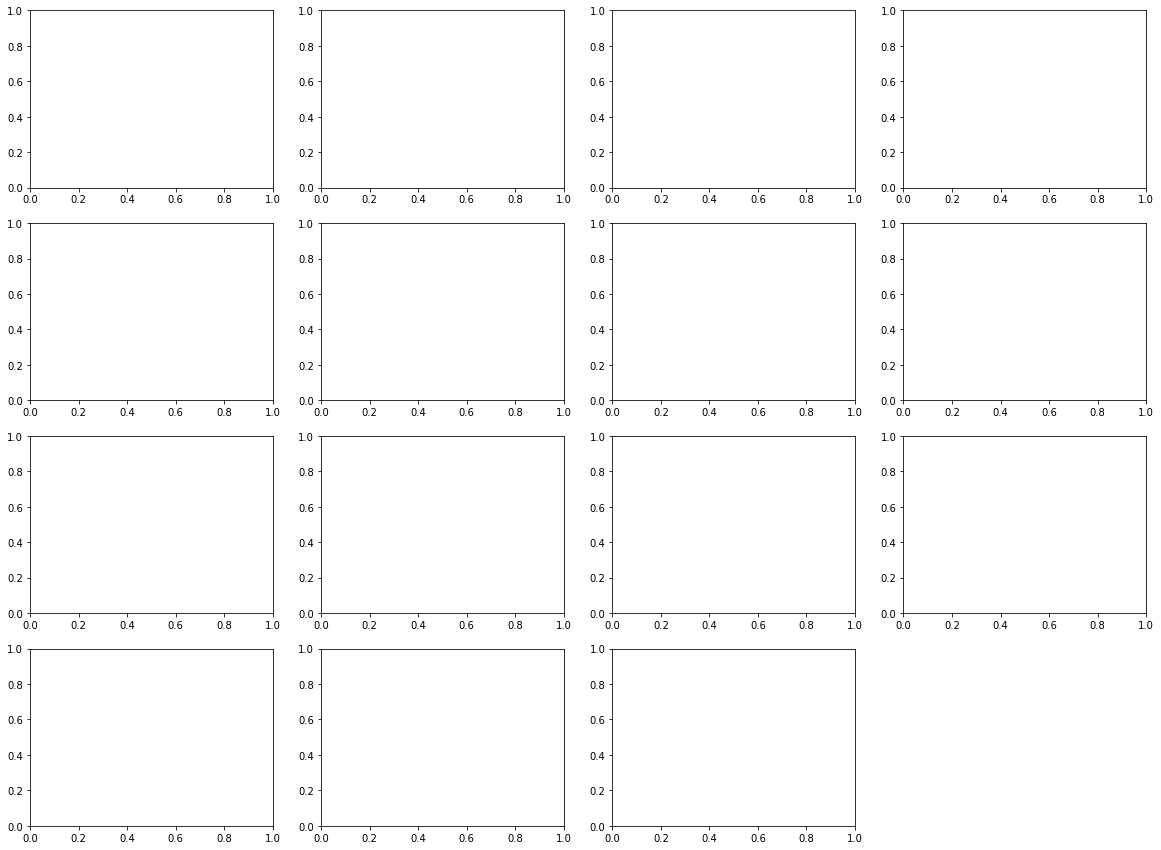

In [29]:
# Overview of whole data set
import matplotlib.pyplot as plt

processing_data[:-1].hist(bins = 50, figsize = (20,15))
plt.show()

In [30]:
cmatrix = processing_data.corr()
cmatrix["Label"].sort_values(ascending = False)

Label               1.000000
Popularity          0.188560
Mode                0.048790
Loudness            0.024206
Tempo               0.024164
Danceability        0.024129
Time Signature      0.023851
Energy              0.014470
Explicit            0.013560
Acousticness       -0.008568
Key                -0.012017
Valence            -0.013575
Liveness           -0.044454
Instrumentalness   -0.076210
Speechiness        -0.095719
Name: Label, dtype: float64

In [31]:
processing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4293 entries, 0 to 4295
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Explicit          4293 non-null   bool   
 1   Popularity        4293 non-null   int64  
 2   Danceability      4293 non-null   float64
 3   Energy            4293 non-null   float64
 4   Key               4293 non-null   float64
 5   Loudness          4293 non-null   float64
 6   Mode              4293 non-null   float64
 7   Speechiness       4293 non-null   float64
 8   Acousticness      4293 non-null   float64
 9   Instrumentalness  4293 non-null   float64
 10  Liveness          4293 non-null   float64
 11  Valence           4293 non-null   float64
 12  Tempo             4293 non-null   float64
 13  Time Signature    4293 non-null   float64
 14  Label             4293 non-null   bool   
dtypes: bool(2), float64(12), int64(1)
memory usage: 477.9 KB


In [32]:
processing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4293 entries, 0 to 4295
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Explicit          4293 non-null   bool   
 1   Popularity        4293 non-null   int64  
 2   Danceability      4293 non-null   float64
 3   Energy            4293 non-null   float64
 4   Key               4293 non-null   float64
 5   Loudness          4293 non-null   float64
 6   Mode              4293 non-null   float64
 7   Speechiness       4293 non-null   float64
 8   Acousticness      4293 non-null   float64
 9   Instrumentalness  4293 non-null   float64
 10  Liveness          4293 non-null   float64
 11  Valence           4293 non-null   float64
 12  Tempo             4293 non-null   float64
 13  Time Signature    4293 non-null   float64
 14  Label             4293 non-null   bool   
dtypes: bool(2), float64(12), int64(1)
memory usage: 477.9 KB


# Data Set Splitting

In [33]:
from sklearn.model_selection import train_test_split

ds_features = processing_data[features[:-1]]
ds_labels = processing_data['Label']

train_X, validation_X, train_Y, validation_Y  = train_test_split(ds_features, 
                                                                 ds_labels,
                                                                 test_size = 0.20)

In [34]:
from imblearn.over_sampling import SMOTE

samp = SMOTE(random_state = 0)

columns = train_X.columns

os_data_X, os_data_Y = samp.fit_sample(train_X, train_Y)

os_data_X = pd.DataFrame(data = os_data_X, columns = columns)
os_data_Y = pd.DataFrame(data = os_data_Y, columns = ['Label'])

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


# Logistic Regression Approach

## Prep

In [35]:
# Converting Trues and Falses into 0 or 1
processing_data[processing_data[:] == True] = 1.0
processing_data[processing_data[:] == False] = 0.0
processing_data['Label'] = processing_data['Label'].astype('float64')

## Recursive Feature Elimination

In [36]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

l_reg = LogisticRegression()

selection = RFE(l_reg, 50)
selection = selection.fit(os_data_X, os_data_Y.values.ravel())
print(selection.support_)
print(selection.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## Training

Looks like we will be using all of the variables I trimmed down to, nice.

In [37]:
l_reg.fit(os_data_X, os_data_Y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Results

In [38]:
l_reg.score(validation_X, validation_Y) * 100

58.207217694994185

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

predictions = l_reg.predict(validation_X)

print("Accuracy:", round(accuracy_score(validation_Y, predictions), 3))
print("Precision:", round(precision_score(validation_Y, predictions), 3))
print("Recall:", round(recall_score(validation_Y, predictions), 3))

Accuracy: 0.582
Precision: 0.602
Recall: 0.596


Text(0.5, 15.0, 'Predicted Label')

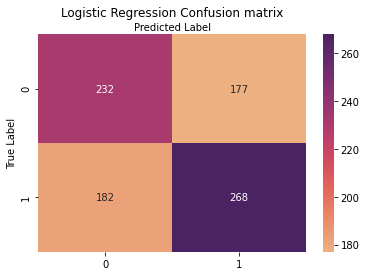

In [40]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(validation_Y, predictions)
labels = [0,1]
fig, ax = plt.subplots()
ticks = np.arange(len(labels))

plt.xticks(ticks, labels)
plt.yticks(ticks, labels)
sns.heatmap(pd.DataFrame(conf_mat), annot=True, cmap="flare", fmt='g')

ax.xaxis.set_label_position("top")
plt.title('Logistic Regression Confusion matrix', y=1.1)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

Our results are very sub-optimal because we are seeing a nearly equal distribution of fasle negatives and false positives, this is far from what we want.

# Decision Tree Classification Approach

## Classifier Training

In [41]:
from sklearn.tree import DecisionTreeClassifier


dt_model = DecisionTreeClassifier(max_depth = 5)
dt_model.fit(train_X, train_Y)

dt_model.score(validation_X, validation_Y)*100

59.37136204889406

## Classifier Results

In [42]:
predictions = dt_model.predict(validation_X)

print("Accuracy:", round(accuracy_score(validation_Y, predictions), 3))
print("Precision:", round(precision_score(validation_Y, predictions), 3))
print("Recall:", round(recall_score(validation_Y, predictions), 3))

Accuracy: 0.594
Precision: 0.646
Recall: 0.498


Text(0.5, 15.0, 'Predicted Label')

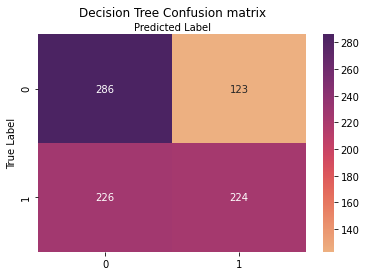

In [43]:
conf_mat = confusion_matrix(validation_Y, predictions)
labels = [0,1]
fig, ax = plt.subplots()
ticks = np.arange(len(labels))

plt.xticks(ticks, labels)
plt.yticks(ticks, labels)
sns.heatmap(pd.DataFrame(conf_mat), annot=True, cmap="flare", fmt='g')

ax.xaxis.set_label_position("top")
plt.title('Decision Tree Confusion matrix', y=1.1)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# Random Forest Approach

## Random Forest Classifier Training

In [44]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(criterion = 'entropy', max_depth = 5, n_estimators = 100)
rf_model.fit(train_X, train_Y)

rf_model.score(validation_X, validation_Y) * 100

58.78928987194412

## Random Forest Classifier Results

In [45]:
predictions = rf_model.predict(validation_X)

print("Accuracy:", round(accuracy_score(validation_Y, predictions), 3))
print("Precision:", round(precision_score(validation_Y, predictions), 3))
print("Recall:", round(recall_score(validation_Y, predictions), 3))

Accuracy: 0.588
Precision: 0.645
Recall: 0.473


Text(0.5, 15.0, 'Predicted Label')

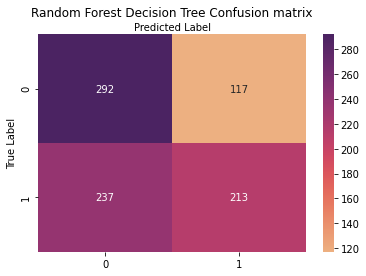

In [46]:
conf_mat = confusion_matrix(validation_Y, predictions)
labels = [0,1]
fig, ax = plt.subplots()
ticks = np.arange(len(labels))

plt.xticks(ticks, labels)
plt.yticks(ticks, labels)
sns.heatmap(pd.DataFrame(conf_mat), annot=True, cmap="flare", fmt='g')

ax.xaxis.set_label_position("top")
plt.title('Random Forest Decision Tree Confusion matrix', y=1.1)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# Neural Network Data Prep
In order to this we must tranform the labels into their 0 and 1 counterparts to fit the Binary classification specifications.

In [47]:
# Copy of the training sets and conversion 
nn_train_X = train_X.copy()
nn_validation_X = validation_X.copy()

nn_train_Y = train_Y.copy()
nn_train_Y[nn_train_Y[:] == True] = 1.0

nn_validation_Y = validation_Y.copy()
nn_validation_Y[nn_validation_Y[:] == True] = 1.0

In [48]:
# Ordinal encoding for categorical variables
for col in nn_train_X.columns:
    if nn_train_X[col].dtypes.name == 'category':
        nn_train_X[col] = nn_train_X[col].astype("float64")

for col in nn_validation_X.columns:
    if nn_validation_X[col].dtypes.name == 'category':
        nn_validation_X[col] = nn_validation_X[col].astype("float64")

In [49]:
nn_validation_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 859 entries, 1565 to 1302
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Explicit          859 non-null    bool   
 1   Popularity        859 non-null    int64  
 2   Danceability      859 non-null    float64
 3   Energy            859 non-null    float64
 4   Key               859 non-null    float64
 5   Loudness          859 non-null    float64
 6   Mode              859 non-null    float64
 7   Speechiness       859 non-null    float64
 8   Acousticness      859 non-null    float64
 9   Instrumentalness  859 non-null    float64
 10  Liveness          859 non-null    float64
 11  Valence           859 non-null    float64
 12  Tempo             859 non-null    float64
 13  Time Signature    859 non-null    float64
dtypes: bool(1), float64(12), int64(1)
memory usage: 94.8 KB


In [50]:
nn_validation_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 859 entries, 1565 to 1302
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Explicit          859 non-null    bool   
 1   Popularity        859 non-null    int64  
 2   Danceability      859 non-null    float64
 3   Energy            859 non-null    float64
 4   Key               859 non-null    float64
 5   Loudness          859 non-null    float64
 6   Mode              859 non-null    float64
 7   Speechiness       859 non-null    float64
 8   Acousticness      859 non-null    float64
 9   Instrumentalness  859 non-null    float64
 10  Liveness          859 non-null    float64
 11  Valence           859 non-null    float64
 12  Tempo             859 non-null    float64
 13  Time Signature    859 non-null    float64
dtypes: bool(1), float64(12), int64(1)
memory usage: 94.8 KB


In [51]:
# Normalizing Training Data
nn_train_X -= nn_train_X.mean(axis = 0)
nn_train_X /= nn_train_X.std(axis = 0)

In [52]:
# Normalizing Validation Data
nn_validation_X -= nn_validation_X.mean(axis = 0)
nn_validation_X /= nn_validation_X.std(axis = 0)

# Binary Classification Neural Network Approach

## BCNN Definition

In [53]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

nn_model = Sequential()
nn_model.add(Dense(8, input_dim = len(ds_features.columns), activation = 'relu'))
nn_model.add(Dense(4, activation = 'relu'))
nn_model.add(Dense(2, activation = 'relu'))
nn_model.add(Dense(1, activation = 'tanh'))

nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 120       
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 3         
Total params: 169
Trainable params: 169
Non-trainable params: 0
_________________________________________________________________


## BCNN Training

In [54]:
# Checking devices available
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [55]:
# Training model
with tf.device('/GPU:0'):
    nn_model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    nn_model.fit(nn_train_X, nn_train_Y, epochs = 100, verbose = True, validation_data = (nn_validation_X, nn_validation_Y))

Epoch 1/100
108/108 [==============================] - 2s 4ms/step - loss: 7.3711 - accuracy: 0.5221 - val_loss: 8.0806 - val_accuracy: 0.4761
Epoch 2/100
108/108 [==============================] - 0s 3ms/step - loss: 7.3711 - accuracy: 0.5221 - val_loss: 8.0806 - val_accuracy: 0.4761
Epoch 3/100
108/108 [==============================] - 0s 3ms/step - loss: 7.3711 - accuracy: 0.5221 - val_loss: 8.0806 - val_accuracy: 0.4761
Epoch 4/100
108/108 [==============================] - 0s 2ms/step - loss: 7.3711 - accuracy: 0.5221 - val_loss: 8.0806 - val_accuracy: 0.4761
Epoch 5/100
108/108 [==============================] - 0s 2ms/step - loss: 7.3711 - accuracy: 0.5221 - val_loss: 8.0806 - val_accuracy: 0.4761
Epoch 6/100
108/108 [==============================] - 0s 2ms/step - loss: 7.3711 - accuracy: 0.5221 - val_loss: 8.0806 - val_accuracy: 0.4761
Epoch 7/100
108/108 [==============================] - 0s 3ms/step - loss: 7.3711 - accuracy: 0.5221 - val_loss: 8.0806 - val_accuracy: 0.4761

In [61]:
# Evaluating the neural network
nn_predictions = nn_model.predict(nn_validation_X).round()

In [62]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

acc_score = accuracy_score(nn_validation_Y, nn_predictions)
acc_score

0.47613504074505236

In [63]:
prec_score = precision_score(nn_validation_Y, nn_predictions)
prec_score

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [59]:
rec_score = recall_score(nn_validation_Y, nn_predictions)
rec_score

0.0

In [60]:
f1 = f1_score(nn_validation_Y, nn_predictions)
f1

0.0

# Convolutional Neural Network Approach (SuperTML)
Following concepts from this paper here: https://arxiv.org/abs/1903.06246

## Data Prep

In [64]:
# Copying datasets over to be manipulated
cnn_train_X = nn_train_X.copy()
cnn_train_Y = nn_train_Y.copy()

cnn_valid_X = nn_validation_X.copy()
cnn_valid_Y = nn_validation_Y.copy()

## Transforming Features Into Images

In [65]:
!fc-list

/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf: Liberation Sans Narrow:style=Italic
/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf: Liberation Sans:style=Regular
/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf: Liberation Mono:style=Bold Italic
/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf: Liberation Serif:style=Italic
/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf: Liberation Mono:style=Bold
/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf: Liberation Sans Narrow:style=Regular
/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf: Liberation Serif:style=Bold
/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf: Liberation Mono:style=Regular
/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf: Liberation Sans:style=Italic
/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf: Liberation Serif:style=Bold Italic
/usr/share/fonts/truet

A large portion of the following conversion algorithm is based on [EmjayAhn's implementation of feature creation.](https://github.com/EmjayAhn/SuperTML-pytorch/blob/c962956fe80112ec9cae9086fca296b52c67718a/data_preparation.py#L28)

My algorithm differs in the number of parameters it is converting, its final format (channels last), and that it is taking a Pandas data frame as input.

In [66]:
# can likely improve this by not constructing a dataset in memory

from PIL import Image, ImageDraw, ImageFont
import pandas as pd

def imageEncode(data):
    images = []
    font = ImageFont.truetype("LiberationMono-Regular.ttf", size = 25)
    location = [(25, 20), (100, 20), (175, 20), 
                (25, 70), (100, 70), (175, 70), 
                (25, 120), (100, 120), (175, 120), 
                (25, 170), (100, 170),(175, 170),
                (50, 215), (150, 215)]
    

    # Going through each row
    for row in data.iterrows():
        # Generate base image
        bg = np.array([[0 for _ in range(255)] for _ in range(255)], dtype = 'uint8')
        image = Image.fromarray(bg)
        draw = ImageDraw.Draw(image)

        # Adding each feature to the image
        l = 0
        for col in range(0, len(data.columns)):
          value = round(row[1][col], 2)
#           if value < -0.50:
#             draw.text(location[l], str(value), fill = '#333399', font = font)
#           elif value > -0.50 and value < 0.0:
#             draw.text(location[l], str(value), fill = '#3366cc', font = font)
#           elif value == 0.0:
#             draw.text(location[l], str(value), fill = 'white', font = font)
#           elif value > 0.0 and value < 0.50:
#             draw.text(location[l], str(value), fill = '#cc6600', font = font)
#           elif value > 0.50:
#             draw.text(location[l], str(value), fill = '#cc3300', font = font)
          
          draw.text(location[l], str(value), fill = 'white', font = font)
          l += 1
        
        rgb = [np.array(image, dtype='uint8') for _ in range(3)]
        images.append(rgb)

    images = np.array(images) / 255

    # move to channels last format
    images = np.moveaxis(images, 1, -1)

    return images

In [67]:
temp_set = imageEncode(cnn_train_X.sample(1))

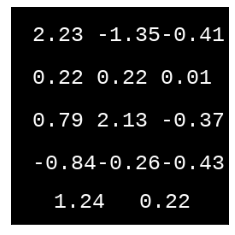

In [68]:
plt.figure()
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(temp_set[0])

In [69]:
cnn_train_X = imageEncode(cnn_train_X)
cnn_valid_X = imageEncode(cnn_valid_X)

In [70]:
print(cnn_train_X.shape)
print(cnn_valid_X.shape)

(3434, 255, 255, 3)
(859, 255, 255, 3)


## Network Definition

In [71]:
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dropout, Flatten, Conv2D, MaxPooling2D, Dense, Activation
    
cnn_model = Sequential()
cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(255, 255, 3)))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))

cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(10))
cnn_model.add(Dense(1, activation = 'tanh'))

cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 253, 253, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 126, 126, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 124, 124, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 230400)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

## Network Training

In [72]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001)

with tf.device('/GPU:0'):
    cnn_model.compile(loss = 'binary_crossentropy', optimizer = optimizer, metrics = ['accuracy'])
    cnn_model.fit(cnn_train_X, cnn_train_Y, epochs = 5, verbose = True, validation_data = (cnn_valid_X, cnn_valid_Y))

Epoch 1/5
108/108 [==============================] - 18s 34ms/step - loss: 1.0371 - accuracy: 0.5076 - val_loss: 0.7016 - val_accuracy: 0.5227
Epoch 2/5
108/108 [==============================] - 3s 26ms/step - loss: 0.6755 - accuracy: 0.5751 - val_loss: 0.6901 - val_accuracy: 0.5704
Epoch 3/5
108/108 [==============================] - 3s 26ms/step - loss: 0.6636 - accuracy: 0.5897 - val_loss: 0.6656 - val_accuracy: 0.6042
Epoch 4/5
108/108 [==============================] - 3s 26ms/step - loss: 0.6732 - accuracy: 0.5920 - val_loss: 0.6758 - val_accuracy: 0.5902
Epoch 5/5
108/108 [==============================] - 3s 26ms/step - loss: 0.6519 - accuracy: 0.6136 - val_loss: 0.6973 - val_accuracy: 0.5728


It appears that even with a realtively simple network, normalization, and Adam dropout optimization there is some clear overfitting happening here. Even when using a minute learning rate, the model produces the same accuracy metrics for each pass. This constitutes a dead end for this method as I cannot produce more accurately labeled data. 

Either this approach to the network is flawed or perhaps a simpler method overall is more advantageous for a solution.